C:\Users\kp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  del sys.path[0]


Text(0, 0.5, 'Support')

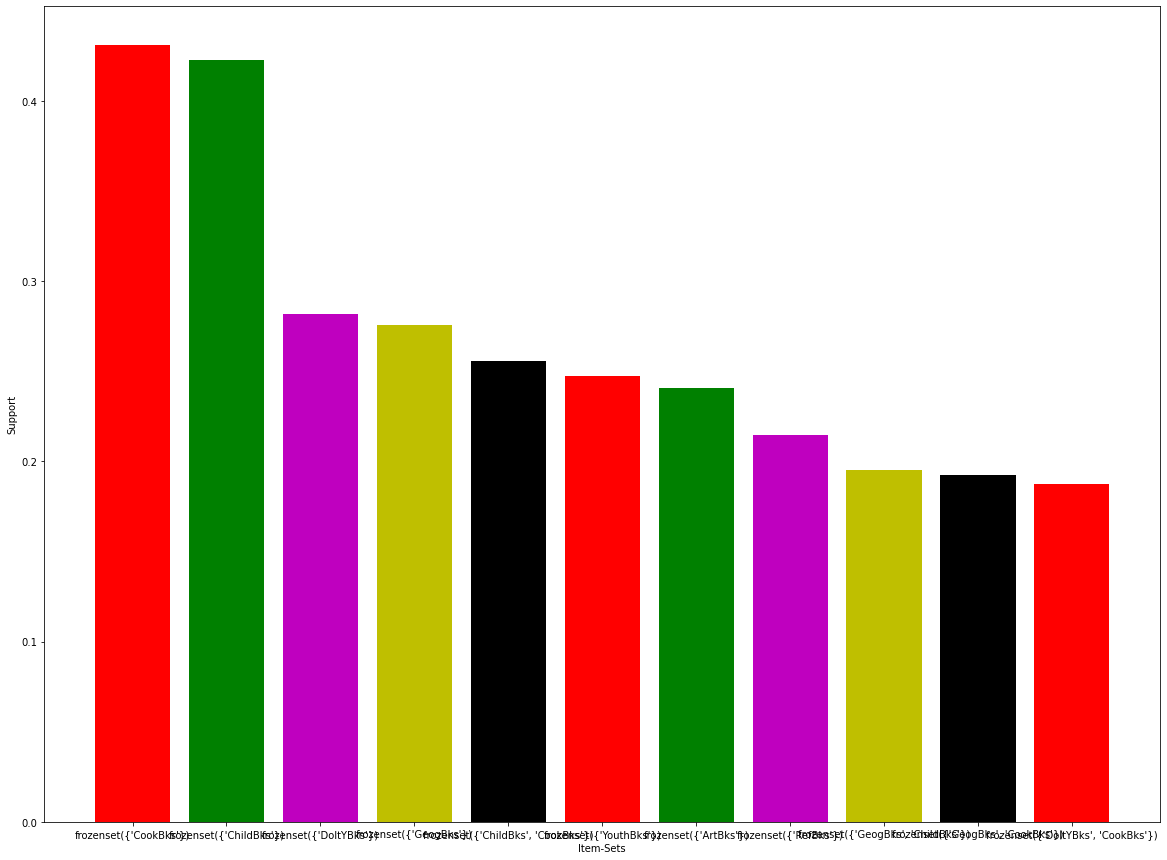

In [22]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from collections import Counter
import matplotlib.pyplot as plt
import re

books=pd.read_csv("C:\\Users\\kp\\Pictures\\Assignments\\Association Rule Mining[ARM]\\book.csv")

frequent_itemsets = apriori(books, min_support=0.005, max_len=4,use_colnames = True)
frequent_itemsets.sort_values('support',ascending = False,inplace=True)

plt.figure(figsize=(20,15))
plt.bar(x=range(0,11),height = frequent_itemsets.support[0:11],color='rgmyk')
plt.xticks(list(range(0,11)),frequent_itemsets.itemsets[0:11])
plt.xlabel('Item-Sets')
plt.ylabel('Support')

In [23]:
rules_mining = association_rules(frequent_itemsets, metric="lift", min_threshold=1)


def to_list(i):
    return (list(i))

redundant_list = rules_mining.antecedents.apply(to_list) + rules_mining.consequents.apply(to_list)


redundant_list = redundant_list.apply(sorted)
redundant_list=redundant_list.str.join(',')
rules_mining["Antecedents_Consequents"]=pd.Series(redundant_list)

rules_mining.drop_duplicates(subset ="Antecedents_Consequents", keep ='first', inplace = True)
rules_mining.sort_values('lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,Antecedents_Consequents
2208,(ItalArt),(ItalAtlas),0.0485,0.0370,0.0165,0.340206,9.194762,0.014706,1.459547,"ItalArt,ItalAtlas"
3052,"(ItalCook, ItalArt)",(ItalAtlas),0.0375,0.0370,0.0125,0.333333,9.009009,0.011113,1.444500,"ItalArt,ItalAtlas,ItalCook"
1420,"(ItalCook, DoItYBks)",(ItalArt),0.0585,0.0485,0.0250,0.427350,8.811349,0.022163,1.661575,"DoItYBks,ItalArt,ItalCook"
3908,"(DoItYBks, ItalArt)",(ItalAtlas),0.0300,0.0370,0.0095,0.316667,8.558559,0.008390,1.409268,"DoItYBks,ItalArt,ItalAtlas"
4314,"(ItalCook, DoItYBks, ItalArt)",(ItalAtlas),0.0250,0.0370,0.0075,0.300000,8.108108,0.006575,1.375714,"DoItYBks,ItalArt,ItalAtlas,ItalCook"
4402,"(Florence, ItalArt, GeogBks)",(ItalCook),0.0090,0.1135,0.0075,0.833333,7.342144,0.006478,5.319000,"Florence,GeogBks,ItalArt,ItalCook"
880,(ItalCook),(ItalArt),0.1135,0.0485,0.0375,0.330396,6.812298,0.031995,1.420990,"ItalArt,ItalCook"
4258,"(Florence, ItalArt, ChildBks)",(ItalCook),0.0105,0.1135,0.0080,0.761905,6.712817,0.006808,3.723300,"ChildBks,Florence,ItalArt,ItalCook"
3874,"(Florence, ItalArt)",(ItalCook),0.0125,0.1135,0.0095,0.760000,6.696035,0.008081,3.693750,"Florence,ItalArt,ItalCook"
3776,"(Florence, ItalArt, ArtBks)",(ItalCook),0.0125,0.1135,0.0095,0.760000,6.696035,0.008081,3.693750,"ArtBks,Florence,ItalArt,ItalCook"
